医院感染数据整理

In [1]:
import pandas as pd 
import numpy as np

# matplotlib、seaborn、plotly都是绘图工具
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go 
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# 指定字体
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


font_path = 'C:\Windows\Fonts\msyh.ttc'  # 微软雅黑
font_prop = fm.FontProperties(fname=font_path, size=12)

en_font_path = 'C:\Windows\Fonts\TIMES.TTF'  # 新罗马字体 数字用
en_font_prop = fm.FontProperties(fname=en_font_path, size=12)




# --- Importing Libraries ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import warnings
import os
import yellowbrick
import joblib


from pywaffle import Waffle
from statsmodels.graphics.gofplots import qqplot
from PIL import Image
from highlight_text import fig_text
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
import lightgbm as lgb
from sklearn.metrics import classification_report, accuracy_score
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from yellowbrick.contrib.wrapper import wrap
from yellowbrick.style import set_palette


from catboost import CatBoostClassifier
import optuna
from sklearn.model_selection import cross_val_score

导入数据

In [2]:
df = pd.read_excel("G:/2023/infection/data/填补后数据.xlsx")

df.head()

,感染,性别,年龄,身高,体重,BMI,高血压,糖尿病,肿瘤,并发症种类,...,钠,氯,总二氧化碳浓度,手术时长,切口类型,有无进重症室,抗菌药物使用,联合用药,治疗用药已送细菌培养,住院天数
0,否,男,50,173.0,65.0,21.72,否,否,否,1,...,133.1,95.6,27.6,0.0,0,否,是,是,是,31
1,否,男,24,173.0,73.0,24.39,否,否,否,1,...,134.8,98.6,25.8,0.0,0,否,否,否,否,27
2,否,男,49,180.0,80.0,24.69,否,否,否,1,...,142.4,108.0,25.4,2.0,1,否,否,否,否,5
3,否,男,30,160.0,95.0,37.11,是,否,否,1,...,140.1,105.7,24.1,3.0,2,否,是,是,否,16
4,否,男,55,170.0,70.0,24.22,否,否,否,2,...,140.8,104.8,24.0,1.5,1,否,否,否,否,4


In [3]:
#查看结局分部
df.感染.value_counts()

否    1266
是      50
Name: 感染, dtype: int64

缺失值柱状图可视化

数据类型处理

In [4]:
# 获取所有列名
column_names = df.columns.tolist()

# 打印列名
print(column_names)

['感染', '性别', '年龄', '身高', '体重', 'BMI', '高血压', '糖尿病', '肿瘤', '并发症种类', '吸烟', '饮酒', '体温', '脉搏', '呼吸', '收缩压', '舒张压', '睡眠情况', '睡眠时间', '营养筛查NRS', '有创操作', '泌尿道插管', '气管插管', '动静脉导管', '血培养', '尿常规', '大便常规', '细菌培养', '白细胞', '中性粒细胞绝对值', '淋巴细胞绝对值', '红细胞', '血红蛋白', '血小板', '降钙素原', '血清白细胞介素6', '总蛋白', '白蛋白', '球蛋白', '白蛋白球蛋白比', '谷丙转氨酶', '谷草转氨酶', '总胆红素', '直接胆红素', '间接胆红素', '碱性磷酸酶', 'r.谷氨酰基转移酶', '尿素氮', '肌酐', '尿酸', '钾', '钠', '氯', '总二氧化碳浓度', '手术时长', '切口类型', '有无进重症室', '抗菌药物使用', '联合用药', '治疗用药已送细菌培养', '住院天数']


In [5]:
df['感染'].unique()

array(['否', '是'], dtype=object)

In [6]:
cat_var =["性别" , "高血压" ,"糖尿病" , "肿瘤" , "吸烟" , "饮酒"  , "睡眠情况","有创操作"  ,   "泌尿道插管" ,  
        "气管插管","动静脉导管", "血培养"  , "尿常规"    ,  "大便常规", "细菌培养" ,"降钙素原"  , "血清白细胞介素6", "切口类型"  , "有无进重症室",  "抗菌药物使用"  ,  
        "联合用药", "治疗用药已送细菌培养"]

num_var= ["年龄" , "身高" ,"体重"  , "BMI" , "并发症种类" ,"体温", "脉搏","呼吸","收缩压"  ,"舒张压",
           "睡眠时间" ,"营养筛查NRS","白细胞","中性粒细胞绝对值" ,"淋巴细胞绝对值","红细胞","血红蛋白" ,"血小板" ,
           "总蛋白","白蛋白" ,"球蛋白" , "白蛋白球蛋白比","谷丙转氨酶","谷草转氨酶","总胆红素","直接胆红素" ,"间接胆红素" ,"碱性磷酸酶" , "r.谷氨酰基转移酶" ,
           "尿素氮" , "肌酐" , "尿酸"  ,  "钾"  , "钠"   ,  "氯"  ,"总二氧化碳浓度" ,"手术时长" ,"住院天数"]

In [7]:
# 查看每列的数据类型
data_types = df.dtypes
print(data_types)


感染             object
性别             object
年龄              int64
身高            float64
体重            float64
               ...   
有无进重症室         object
抗菌药物使用         object
联合用药           object
治疗用药已送细菌培养     object
住院天数            int64
Length: 61, dtype: object


In [8]:
X2 = df.drop(['感染'], axis=1)
y_1 = df['感染']

In [9]:
from sklearn.preprocessing import LabelEncoder

# 创建LabelEncoder对象
label_encoder = LabelEncoder()

# 将目标变量编码为整数
y = label_encoder.fit_transform(y_1)


In [10]:
X_train, X_test, Ytrain,Ytest = train_test_split(X2, y, test_size=0.3, random_state=42)

In [11]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
# Fit the encoder on the training set and transform it
cat_Train = encoder.fit_transform(X_train[cat_var])

# Transform the test set based on the encoder fitted on the training set
cat_Test = encoder.transform(X_test[cat_var])


In [12]:
# 打印出每个特征的映射关系
for i, cat in enumerate(cat_var):
    mapping = {category: index for index, category in enumerate(encoder.categories_[i])}
    print(f"Feature '{cat}' mapping: {mapping}")

Feature '性别' mapping: {'女': 0, '男': 1}
Feature '高血压' mapping: {'否': 0, '是': 1}
Feature '糖尿病' mapping: {'否': 0, '是': 1}
Feature '肿瘤' mapping: {'否': 0, '是': 1}
Feature '吸烟' mapping: {'否': 0, '是': 1}
Feature '饮酒' mapping: {'否': 0, '是': 1}
Feature '睡眠情况' mapping: {'不正常': 0, '正常': 1}
Feature '有创操作' mapping: {'否': 0, '是': 1}
Feature '泌尿道插管' mapping: {'否': 0, '是': 1}
Feature '气管插管' mapping: {'否': 0, '是': 1}
Feature '动静脉导管' mapping: {'否': 0, '是': 1}
Feature '血培养' mapping: {'否': 0, '是': 1}
Feature '尿常规' mapping: {'否': 0, '是': 1}
Feature '大便常规' mapping: {'否': 0, '是': 1}
Feature '细菌培养' mapping: {'否': 0, '是': 1}
Feature '降钙素原' mapping: {'偏高': 0, '正常': 1}
Feature '血清白细胞介素6' mapping: {'偏高': 0, '正常': 1}
Feature '切口类型' mapping: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
Feature '有无进重症室' mapping: {'否': 0, '是': 1}
Feature '抗菌药物使用' mapping: {'否': 0, '是': 1}
Feature '联合用药' mapping: {'否': 0, '是': 1}
Feature '治疗用药已送细菌培养' mapping: {'否': 0, '是': 1}


In [13]:
from sklearn.preprocessing import StandardScaler
num_train=X_train[num_var]
num_test=X_test[num_var]
# 初始化特征缩放器
scaler = StandardScaler()

# 对训练集进行拟合和转换
X_train_scaled = scaler.fit_transform(num_train)

# 对测试集进行转换（只使用transform，不重新拟合）
X_test_scaled = scaler.transform(num_test)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=num_var)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=num_var)

cat_Test_df = pd.DataFrame(cat_Test, columns=cat_var)
cat_Train_df = pd.DataFrame(cat_Train, columns=cat_var)

In [14]:
print(type(cat_Test_df))  # 查看 cat_Test 的数据类型
print(type(X_test_scaled_df))  # 查看 X_test_scaled_df 的数据类型

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [15]:
Xtest2 = pd.concat([cat_Test_df, X_test_scaled_df], axis=1)
Xtrain2 = pd.concat([cat_Train_df,X_train_scaled_df],axis=1)

In [16]:
Xtest=Xtest2.drop(['有创操作','大便常规','抗菌药物使用','治疗用药已送细菌培养','尿常规'],axis=1)
Xtrain=Xtrain2.drop(['有创操作','大便常规','抗菌药物使用','治疗用药已送细菌培养','尿常规'],axis=1)

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.font_manager as fm
from sklearn.model_selection import learning_curve

# 字体设置
font_path = 'C:\\Windows\\Fonts\\msyh.ttc'  # 微软雅黑字体路径
en_font_path = 'C:\\Windows\\Fonts\\TIMES.TTF'  # Times New Roman字体路径
font_prop = fm.FontProperties(fname=font_path, size=12)
en_font_prop = fm.FontProperties(fname=en_font_path, size=12)

def plot_evaluation_curves(model, X_train, y_train, X_test, y_test, axes, algo_name, font_prop, en_font_prop,best_threshold):
    # 计算训练数据和测试数据的ROC曲线参数
    y_proba_train = model.predict_proba(X_train)[:, 1]
    y_proba_test = model.predict_proba(X_test)[:, 1]
    fpr_train, tpr_train, _ = roc_curve(y_train, y_proba_train)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_proba_test)
    auc_train = roc_auc_score(y_train, y_proba_train)
    auc_test = roc_auc_score(y_test, y_proba_test)

    
    axes[0].plot(fpr_train, tpr_train, label='训练集 ROC (AUC = {:.3f})'.format(auc_train))
    axes[0].plot(fpr_test, tpr_test, label='测试集 ROC (AUC = {:.3f})'.format(auc_test))
    axes[0].set_xlabel('假阳性率', fontproperties=font_prop)
    axes[0].set_ylabel('真阳性率', fontproperties=font_prop)
    axes[0].set_title('ROC 曲线', fontproperties=font_prop)
    axes[0].legend(prop=font_prop)
    
    # 绘制学习曲线
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv=5)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    axes[1].set_title('学习曲线', fontproperties=font_prop)
    axes[1].set_xlabel('训练样本量', fontproperties=font_prop)
    axes[1].set_ylabel('得分', fontproperties=font_prop)
    axes[1].grid()
    axes[1].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1, color="r")
    axes[1].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1, color="g")
    axes[1].plot(train_sizes, train_scores_mean, 'o-', color="r", label="训练得分")
    axes[1].plot(train_sizes, test_scores_mean, 'o-', color="g", label="交叉验证得分")
    axes[1].legend(prop=font_prop)

    # 绘制混淆矩阵
    probabilities = model.predict_proba(X_test)[:, 1]
    y_pred_based_on_best_threshold = (probabilities > best_threshold).astype(int)
    cm = confusion_matrix(Ytest, y_pred_based_on_best_threshold)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[2])
    axes[2].set_title('混淆矩阵', fontproperties=font_prop)
    axes[2].set_xlabel('预测标签', fontproperties=font_prop)
    axes[2].set_ylabel('真实标签', fontproperties=font_prop)
    

    # 添加主标题
    plt.suptitle(f'{algo_name} 模型评价', fontsize=14, fontweight='bold', fontproperties=font_prop)

    plt.tight_layout()



n_trials = 30

没有进行任何平衡处理  只调整了阈值

In [18]:
def cat_objective(trial):
    depth = trial.suggest_int("depth", 2, 12)
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-3, 1)
    random_strength = trial.suggest_int("random_strength", 1, 10)
    iterations = trial.suggest_int("iterations", 50, 500)
    l2_leaf_reg = trial.suggest_loguniform("l2_leaf_reg", 1e-6, 10)  # L2 regularization parameter

    model = CatBoostClassifier(
        depth=depth,
        learning_rate=learning_rate,
        random_strength=random_strength,
        iterations=iterations,
        l2_leaf_reg=l2_leaf_reg,  # Use l2_leaf_reg for regularization
        silent=True,
        early_stopping_rounds=50,  # Implement early stopping
    )
    
    score = cross_val_score(model, Xtrain, Ytrain, cv=5, n_jobs=-1).mean()
    return score

print("Optimizing CatBoostClassifier...")
cat_study = optuna.create_study(direction="maximize")
cat_study.optimize(cat_objective, n_trials=n_trials)

print("Best parameters for CatBoostClassifier:")
cat_best_params = cat_study.best_params
print(cat_best_params)

cat_clf = CatBoostClassifier(**cat_best_params, silent=True).fit(Xtrain, Ytrain)



[I 2024-02-01 15:09:59,332] A new study created in memory with name: no-name-db69e121-46d1-418d-83fb-ecb7d256fba0


Optimizing CatBoostClassifier...


[I 2024-02-01 15:10:00,895] Trial 0 finished with value: 0.9717743830787308 and parameters: {'depth': 2, 'learning_rate': 0.00103331253325325, 'random_strength': 5, 'iterations': 57, 'l2_leaf_reg': 0.00013445937897734107}. Best is trial 0 with value: 0.9717743830787308.
[I 2024-02-01 15:10:02,610] Trial 1 finished with value: 0.9717743830787308 and parameters: {'depth': 4, 'learning_rate': 0.0023823083458691446, 'random_strength': 9, 'iterations': 473, 'l2_leaf_reg': 0.0006501719378995807}. Best is trial 0 with value: 0.9717743830787308.
[I 2024-02-01 15:10:08,670] Trial 2 finished with value: 0.9848002350176264 and parameters: {'depth': 8, 'learning_rate': 0.02255419205828198, 'random_strength': 2, 'iterations': 484, 'l2_leaf_reg': 1.5839336796031513}. Best is trial 2 with value: 0.9848002350176264.
[I 2024-02-01 15:10:09,716] Trial 3 finished with value: 0.9739482961222091 and parameters: {'depth': 4, 'learning_rate': 0.015806095746077397, 'random_strength': 6, 'iterations': 105, 'l2

Best parameters for CatBoostClassifier:
{'depth': 7, 'learning_rate': 0.0980335336114312, 'random_strength': 3, 'iterations': 235, 'l2_leaf_reg': 6.917184644651499}


In [19]:
import numpy as np
from sklearn.metrics import precision_recall_curve, accuracy_score, f1_score

# 获取预测概率
probabilities = cat_clf.predict_proba(Xtest)[:, 1]

# 计算精确度和召回率
precision, recall, thresholds = precision_recall_curve(Ytest, probabilities)

# 添加最后一个阈值1（确保完整的覆盖）
thresholds = np.append(thresholds, 1)

# 计算每个阈值的F1分数
f1_scores = 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1])

# 找到最大F1分数及对应的阈值
max_f1_index = np.nanargmax(f1_scores)  # 使用nanargmax处理NaN值
best_threshold_cat = thresholds[max_f1_index]
best_f1 = f1_scores[max_f1_index]

# 使用最佳阈值进行最终预测
final_preds = (probabilities > best_threshold_cat).astype(int)

# 计算最终模型的性能指标
final_accuracy = accuracy_score(Ytest, final_preds)
final_f1 = f1_score(Ytest, final_preds)

# 输出最佳阈值及性能指标
print("最佳阈值:", best_threshold_cat)
print("最终准确率:", final_accuracy)
print("最终F1分数:", final_f1)



最佳阈值: 0.07643750146601842
最终准确率: 0.9822784810126582
最终F1分数: 0.8571428571428572


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       371
           1       0.84      0.88      0.86        24

    accuracy                           0.98       395
   macro avg       0.92      0.93      0.92       395
weighted avg       0.98      0.98      0.98       395



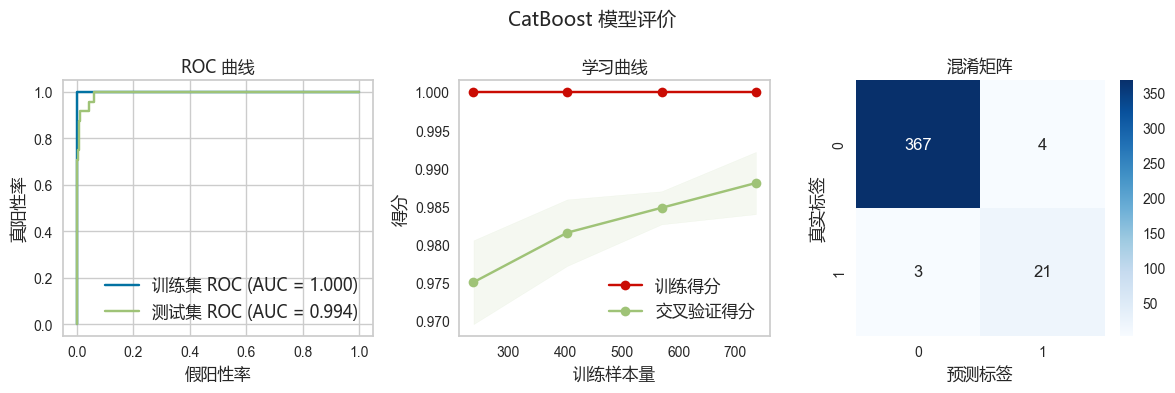

In [20]:


# 使用 predict_proba 而不是 predict
y_proba_train = cat_clf.predict_proba(Xtrain)[:, 1]  # 获取正类的概率
y_proba_test = cat_clf.predict_proba(Xtest)[:, 1]

# 应用最佳阈值进行分类
y_pred_train = (y_proba_train > best_threshold_cat).astype(int)
y_pred_test = (y_proba_test > best_threshold_cat).astype(int)

# 计算准确率
acc_train = accuracy_score(y_pred_train, Ytrain) * 100
acc_test = accuracy_score(y_pred_test, Ytest) * 100

# 输出分类报告
print(classification_report(Ytest, y_pred_test))

# 创建画布和调用函数
fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # 为三个子图调整画布大小
plot_evaluation_curves(cat_clf, Xtrain, Ytrain, Xtest, Ytest, axes, "CatBoost", font_prop, en_font_prop,best_threshold_cat)
plt.show()


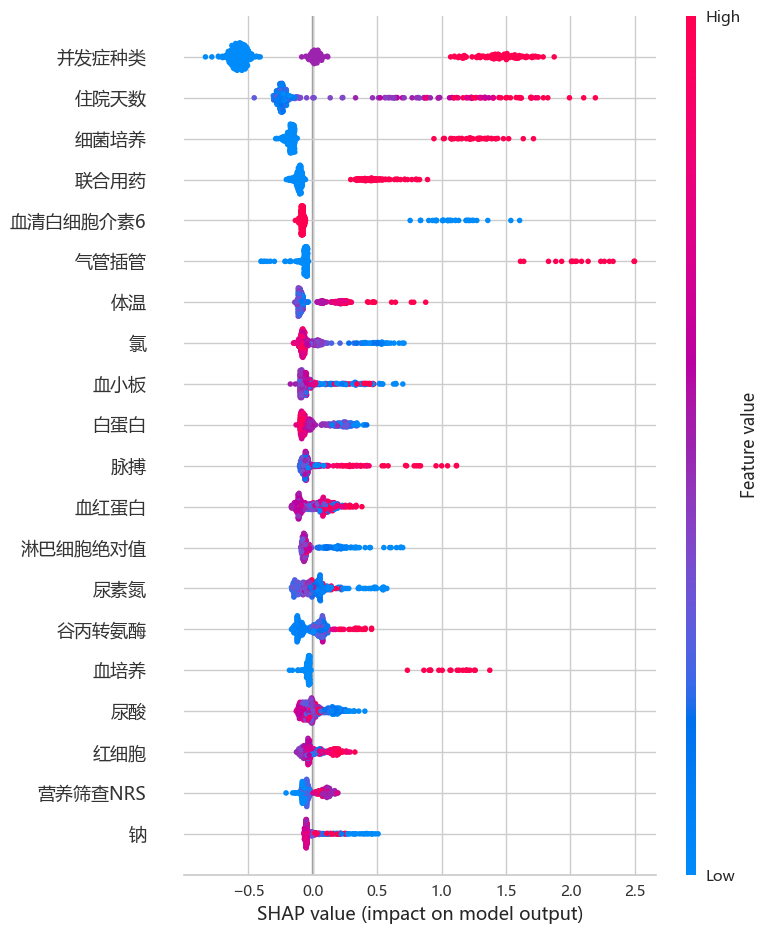

In [21]:
import matplotlib.pyplot as plt
import shap
from matplotlib.font_manager import FontProperties

# 指定字体路径
font_path = 'C:/Windows/Fonts/msyh.ttc'  # Windows下的路径

# 设置字体属性
font_prop = FontProperties(fname=font_path, size=12)
plt.rcParams['font.family'] = font_prop.get_name()

# 创建SHAP解释器并计算SHAP值
explainer = shap.Explainer(cat_clf)
shap_values = explainer.shap_values(Xtest)

# 绘制SHAP摘要图
shap.summary_plot(shap_values, Xtest, show=False)

# 显示图表
plt.show()


In [73]:
# LGBMClassifier 目标函数
def lgbm_objective(trial):
    num_leaves = trial.suggest_int('num_leaves', 2, 550)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1.0)
    n_estimators = trial.suggest_int('n_estimators', 10, 500)
    max_depth = trial.suggest_int('max_depth', 1, 15)
    min_split_gain = trial.suggest_float('min_split_gain', 0, 1)
    subsample = trial.suggest_float('subsample', 0.1, 1)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.1, 1)
    reg_alpha = trial.suggest_loguniform('reg_alpha', 1e-8, 1)
    reg_lambda = trial.suggest_loguniform('reg_lambda', 1e-8, 1)

    lgbm = lgb.LGBMClassifier(num_leaves=num_leaves,
                              learning_rate=learning_rate,
                              n_estimators=n_estimators,
                              max_depth=max_depth,
                              min_split_gain=min_split_gain,
                              subsample=subsample,
                              colsample_bytree=colsample_bytree,
                              reg_alpha=reg_alpha,
                              reg_lambda=reg_lambda,
                              n_jobs=-1,
                              random_state=42)

    score = cross_val_score(lgbm, Xtrain, Ytrain, cv=5, scoring='roc_auc')  # 使用AUC作为评分指标
    return score.mean()

#对 LGBMClassifier 进行优化

print("Optimizing LGBMClassifier...")
lgbm_study = optuna.create_study(direction="maximize")
lgbm_study.optimize(lgbm_objective, n_trials=n_trials)

#输出最佳参数
print("Best parameters for LGBMClassifier:")
LGBM_best_params = lgbm_study.best_params
print(LGBM_best_params)

[I 2024-01-21 13:46:29,019] A new study created in memory with name: no-name-8460b39e-8f2e-46eb-8f0c-20fa6bde52b0


Optimizing LGBMClassifier...


[I 2024-01-21 13:46:29,237] Trial 0 finished with value: 0.9876722532588454 and parameters: {'num_leaves': 93, 'learning_rate': 0.0034317940084454125, 'n_estimators': 420, 'max_depth': 2, 'min_split_gain': 0.8190195781500837, 'subsample': 0.4869429605469606, 'colsample_bytree': 0.8140616596512855, 'reg_alpha': 5.748147547366138e-05, 'reg_lambda': 0.046572051121606506}. Best is trial 0 with value: 0.9876722532588454.
[I 2024-01-21 13:46:29,320] Trial 1 finished with value: 0.9899441340782124 and parameters: {'num_leaves': 185, 'learning_rate': 0.0505513480945186, 'n_estimators': 54, 'max_depth': 10, 'min_split_gain': 0.021889638483516216, 'subsample': 0.5426044024664961, 'colsample_bytree': 0.849003915535965, 'reg_alpha': 0.0015804482508158621, 'reg_lambda': 9.533067940259206e-06}. Best is trial 1 with value: 0.9899441340782124.
[I 2024-01-21 13:46:29,441] Trial 2 finished with value: 0.9911359404096836 and parameters: {'num_leaves': 520, 'learning_rate': 0.10604796651401596, 'n_estimat

Best parameters for LGBMClassifier:
{'num_leaves': 471, 'learning_rate': 0.019137223702358142, 'n_estimators': 297, 'max_depth': 13, 'min_split_gain': 0.519301843819341, 'subsample': 0.18118339757569946, 'colsample_bytree': 0.6524197610043565, 'reg_alpha': 9.995305638832491e-08, 'reg_lambda': 1.7617772561384245e-06}


In [74]:
#用最佳参数重新训练模型
LGBM_clf = lgb.LGBMClassifier(silent=True, n_jobs=-1, **LGBM_best_params).fit(Xtrain, Ytrain)
LGBM_clf.fit(Xtrain, Ytrain)

# 使用模型进行预测
y_pred_lgbm = LGBM_clf.predict(Xtest)

# 获取预测概率
probabilities = LGBM_clf.predict_proba(Xtest)[:, 1]

# 计算精确度和召回率
precision, recall, thresholds = precision_recall_curve(Ytest, probabilities)

# 添加最后一个阈值1（确保完整的覆盖）
thresholds = np.append(thresholds, 1)

# 计算每个阈值的F1分数
f1_scores = 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1])

# 找到最大F1分数及对应的阈值
max_f1_index = np.nanargmax(f1_scores)  # 使用nanargmax处理NaN值
best_threshold_lgb = thresholds[max_f1_index]
best_f1 = f1_scores[max_f1_index]

# 使用最佳阈值进行最终预测
final_preds = (probabilities > best_threshold_lgb).astype(int)

# 计算最终模型的性能指标
final_accuracy = accuracy_score(Ytest, final_preds)
final_f1 = f1_score(Ytest, final_preds)

# 输出最佳阈值及性能指标
print("最佳阈值:", best_threshold_lgb)
print("最终准确率:", final_accuracy)
print("最终F1分数:", final_f1)

最佳阈值: 0.05137382525128732
最终准确率: 0.9873417721518988
最终F1分数: 0.8979591836734694


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       371
           1       0.88      0.92      0.90        24

    accuracy                           0.99       395
   macro avg       0.94      0.95      0.95       395
weighted avg       0.99      0.99      0.99       395



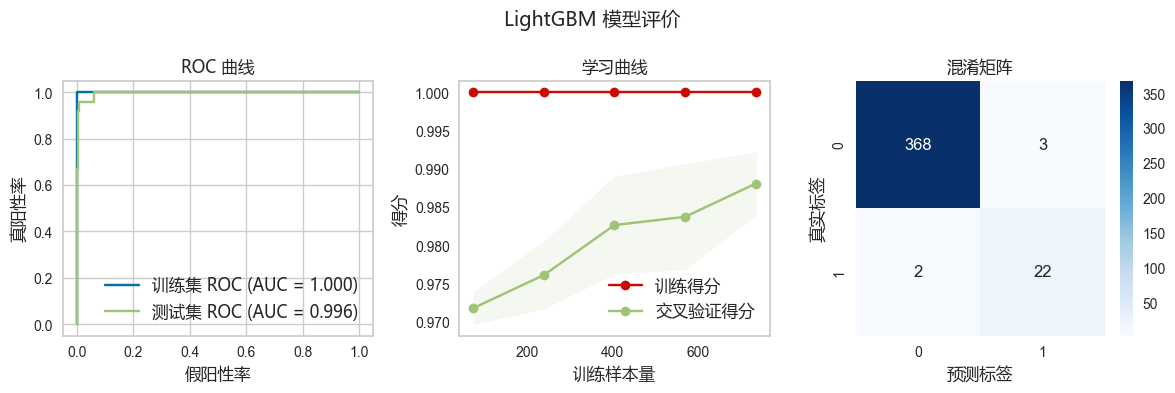

In [75]:

# 使用 predict_proba 而不是 predict
y_proba_train = LGBM_clf.predict_proba(Xtrain)[:, 1]  # 获取正类的概率
y_proba_test = LGBM_clf.predict_proba(Xtest)[:, 1]

# 应用最佳阈值进行分类
y_pred_train = (y_proba_train > best_threshold_lgb).astype(int)
y_pred_test = (y_proba_test > best_threshold_lgb).astype(int)

# 计算准确率
acc_train = accuracy_score(y_pred_train, Ytrain) * 100
acc_test = accuracy_score(y_pred_test, Ytest) * 100

# 输出分类报告
print(classification_report(Ytest, y_pred_test))

fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # 为三个子图调整画布大小
plot_evaluation_curves(LGBM_clf, Xtrain, Ytrain, Xtest, Ytest, axes, "LightGBM", font_prop, en_font_prop,best_threshold_lgb)
plt.show()

In [76]:
def knn_objective(trial):
    n_neighbors = trial.suggest_int("n_neighbors", 1, 60)
    weights = trial.suggest_categorical("weights", ["uniform", "distance"])
    algorithm = trial.suggest_categorical("algorithm", ["auto", "ball_tree", "kd_tree", "brute"])
    leaf_size = trial.suggest_int("leaf_size", 1, 1000)
    p = trial.suggest_int("p", 1, 5)
    metric = trial.suggest_categorical("metric", ["euclidean", "manhattan", "chebyshev", "minkowski"])

    model = KNeighborsClassifier(
        n_neighbors=n_neighbors,
        weights=weights,
        algorithm=algorithm,
        leaf_size=leaf_size,
        p=p,
        metric=metric,
        n_jobs=-1
    )
    score = cross_val_score(model, Xtrain, Ytrain, cv=5, n_jobs=-1).mean()
    return score

print("Optimizing KNeighborsClassifier...")
knn_study = optuna.create_study(direction="maximize")
knn_study.optimize(knn_objective, n_trials=n_trials)

print("Best parameters for KNeighborsClassifier:")
knn_best_params = knn_study.best_params
print(knn_best_params)

knn_clf = KNeighborsClassifier(**knn_best_params).fit(Xtrain,Ytrain)

[I 2024-01-21 13:46:36,462] A new study created in memory with name: no-name-2bf71db0-1547-4fcc-8219-6a5cf4a452e0
[I 2024-01-21 13:46:36,547] Trial 0 finished with value: 0.9761163337250294 and parameters: {'n_neighbors': 3, 'weights': 'uniform', 'algorithm': 'auto', 'leaf_size': 346, 'p': 3, 'metric': 'euclidean'}. Best is trial 0 with value: 0.9761163337250294.
[I 2024-01-21 13:46:36,581] Trial 1 finished with value: 0.9717743830787308 and parameters: {'n_neighbors': 20, 'weights': 'distance', 'algorithm': 'ball_tree', 'leaf_size': 571, 'p': 3, 'metric': 'euclidean'}. Best is trial 0 with value: 0.9761163337250294.
[I 2024-01-21 13:46:36,614] Trial 2 finished with value: 0.9717743830787308 and parameters: {'n_neighbors': 21, 'weights': 'distance', 'algorithm': 'kd_tree', 'leaf_size': 286, 'p': 3, 'metric': 'euclidean'}. Best is trial 0 with value: 0.9761163337250294.


Optimizing KNeighborsClassifier...


[I 2024-01-21 13:46:36,690] Trial 3 finished with value: 0.9717743830787308 and parameters: {'n_neighbors': 47, 'weights': 'distance', 'algorithm': 'brute', 'leaf_size': 631, 'p': 4, 'metric': 'chebyshev'}. Best is trial 0 with value: 0.9761163337250294.
[I 2024-01-21 13:46:36,707] Trial 4 finished with value: 0.9750352526439482 and parameters: {'n_neighbors': 3, 'weights': 'uniform', 'algorithm': 'auto', 'leaf_size': 310, 'p': 5, 'metric': 'chebyshev'}. Best is trial 0 with value: 0.9761163337250294.
[I 2024-01-21 13:46:36,844] Trial 5 finished with value: 0.9717743830787308 and parameters: {'n_neighbors': 44, 'weights': 'uniform', 'algorithm': 'brute', 'leaf_size': 642, 'p': 3, 'metric': 'minkowski'}. Best is trial 0 with value: 0.9761163337250294.
[I 2024-01-21 13:46:36,912] Trial 6 finished with value: 0.9717743830787308 and parameters: {'n_neighbors': 42, 'weights': 'uniform', 'algorithm': 'brute', 'leaf_size': 396, 'p': 2, 'metric': 'chebyshev'}. Best is trial 0 with value: 0.976

Best parameters for KNeighborsClassifier:
{'n_neighbors': 1, 'weights': 'uniform', 'algorithm': 'auto', 'leaf_size': 10, 'p': 1, 'metric': 'euclidean'}


In [77]:
knn_clf.fit(Xtrain, Ytrain)

# 使用模型进行预测
y_pred_knn = knn_clf.predict(Xtest)

# 获取预测概率
probabilities = knn_clf.predict_proba(Xtest)[:, 1]

# 计算精确度和召回率
precision, recall, thresholds = precision_recall_curve(Ytest, probabilities)

# 添加最后一个阈值1（确保完整的覆盖）
thresholds = np.append(thresholds, 1)

# 计算每个阈值的F1分数
f1_scores = 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1])

# 找到最大F1分数及对应的阈值
max_f1_index = np.nanargmax(f1_scores)  # 使用nanargmax处理NaN值
best_threshold_knn = thresholds[max_f1_index]
best_f1 = f1_scores[max_f1_index]

# 使用最佳阈值进行最终预测
final_preds = (probabilities > best_threshold_knn).astype(int)

# 计算最终模型的性能指标
final_accuracy = accuracy_score(Ytest, final_preds)
final_f1 = f1_score(Ytest, final_preds)

# 输出最佳阈值及性能指标
print("最佳阈值:", best_threshold_knn)
print("最终准确率:", final_accuracy)
print("最终F1分数:", final_f1)





最佳阈值: 1.0
最终准确率: 0.9392405063291139
最终F1分数: 0.0


              precision    recall  f1-score   support

           0       0.94      1.00      0.97       371
           1       0.00      0.00      0.00        24

    accuracy                           0.94       395
   macro avg       0.47      0.50      0.48       395
weighted avg       0.88      0.94      0.91       395



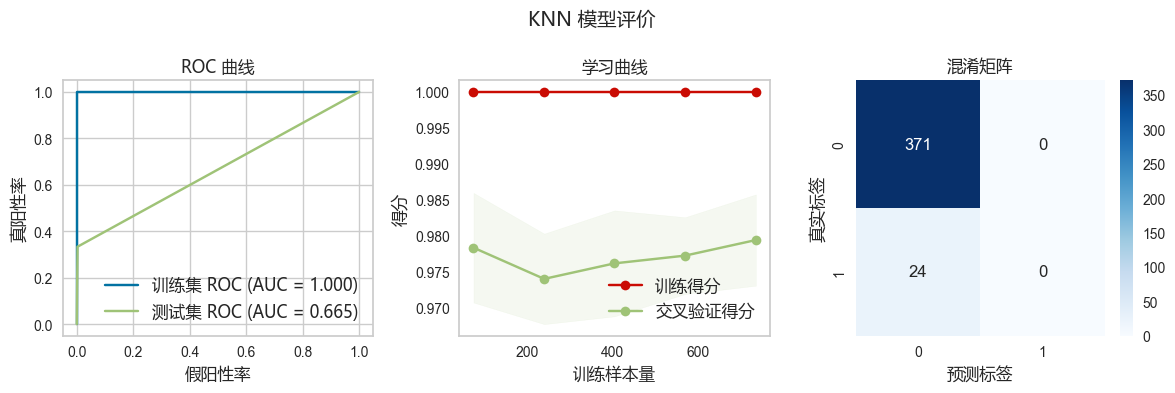

In [78]:

# 使用 predict_proba 而不是 predict
y_proba_train = knn_clf.predict_proba(Xtrain)[:, 1]  # 获取正类的概率
y_proba_test = knn_clf.predict_proba(Xtest)[:, 1]

# 应用最佳阈值进行分类
y_pred_train = (y_proba_train > best_threshold_knn).astype(int)
y_pred_test = (y_proba_test > best_threshold_knn).astype(int)

# 计算准确率
acc_train = accuracy_score(y_pred_train, Ytrain) * 100
acc_test = accuracy_score(y_pred_test, Ytest) * 100

# 输出分类报告
print(classification_report(Ytest, y_pred_test))

fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # 为三个子图调整画布大小
plot_evaluation_curves(knn_clf, Xtrain, Ytrain, Xtest, Ytest, axes, "KNN", font_prop, en_font_prop,best_threshold_knn)
plt.show()

In [79]:
from sklearn.model_selection import StratifiedKFold
# RandomForestClassifier 目标函数
def rf_objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 2000)
    max_depth = trial.suggest_int('max_depth', 10, 1000)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 200)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 200)
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2'])

    rf = RandomForestClassifier(n_estimators=n_estimators,
                                max_depth=max_depth,
                                min_samples_split=min_samples_split,
                                min_samples_leaf=min_samples_leaf,
                                criterion=criterion,
                                max_features=max_features,
                                n_jobs=-1,
                                random_state=42)
    
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(rf, Xtrain, Ytrain, cv=kf, scoring='accuracy')
    return score.mean()

# 使用 Optuna 进行优化，迭代次数设置
n_trials = 30  #1轮大概237秒，4分钟
print("Optimizing RandomForestClassifier...")
rf_study = optuna.create_study(direction="maximize")
rf_study.optimize(rf_objective, n_trials=n_trials)

#输出最佳参数
print("Best parameters for RandomForestClassifier:")
rf_best_params = rf_study.best_params
print(rf_best_params)


[I 2024-01-21 13:46:38,275] A new study created in memory with name: no-name-0a54c1e9-0348-4a9a-b4da-79df467661a7


Optimizing RandomForestClassifier...


[I 2024-01-21 13:46:39,416] Trial 0 finished with value: 0.9717743830787308 and parameters: {'n_estimators': 637, 'max_depth': 641, 'min_samples_split': 177, 'min_samples_leaf': 88, 'criterion': 'entropy', 'max_features': 'sqrt'}. Best is trial 0 with value: 0.9717743830787308.
[I 2024-01-21 13:46:42,212] Trial 1 finished with value: 0.9717743830787308 and parameters: {'n_estimators': 1706, 'max_depth': 133, 'min_samples_split': 34, 'min_samples_leaf': 63, 'criterion': 'entropy', 'max_features': 'sqrt'}. Best is trial 0 with value: 0.9717743830787308.
[I 2024-01-21 13:46:42,868] Trial 2 finished with value: 0.9717743830787308 and parameters: {'n_estimators': 272, 'max_depth': 517, 'min_samples_split': 131, 'min_samples_leaf': 86, 'criterion': 'gini', 'max_features': 'sqrt'}. Best is trial 0 with value: 0.9717743830787308.
[I 2024-01-21 13:46:45,636] Trial 3 finished with value: 0.9717743830787308 and parameters: {'n_estimators': 1936, 'max_depth': 923, 'min_samples_split': 21, 'min_sam

Best parameters for RandomForestClassifier:
{'n_estimators': 1424, 'max_depth': 382, 'min_samples_split': 23, 'min_samples_leaf': 2, 'criterion': 'entropy', 'max_features': 'log2'}


In [80]:

#用最佳参数重新训练模型
rf_clf = RandomForestClassifier(n_jobs=-1, **rf_best_params).fit(Xtrain, Ytrain)

rf_clf.fit(Xtrain, Ytrain)


# 使用模型进行预测
y_pred_knn = rf_clf.predict(Xtest)

# 获取预测概率
probabilities = rf_clf.predict_proba(Xtest)[:, 1]

# 计算精确度和召回率
precision, recall, thresholds = precision_recall_curve(Ytest, probabilities)

# 添加最后一个阈值1（确保完整的覆盖）
thresholds = np.append(thresholds, 1)

# 计算每个阈值的F1分数
f1_scores = 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1])

# 找到最大F1分数及对应的阈值
max_f1_index = np.nanargmax(f1_scores)  # 使用nanargmax处理NaN值
best_threshold_rf = thresholds[max_f1_index]
best_f1 = f1_scores[max_f1_index]

# 使用最佳阈值进行最终预测
final_preds = (probabilities > best_threshold_rf).astype(int)

# 计算最终模型的性能指标
final_accuracy = accuracy_score(Ytest, final_preds)
final_f1 = f1_score(Ytest, final_preds)

# 输出最佳阈值及性能指标
print("最佳阈值:", best_threshold_rf)
print("最终准确率:", final_accuracy)
print("最终F1分数:", final_f1)

最佳阈值: 0.21860328644363758
最终准确率: 0.9822784810126582
最终F1分数: 0.8571428571428572


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       371
           1       0.84      0.88      0.86        24

    accuracy                           0.98       395
   macro avg       0.92      0.93      0.92       395
weighted avg       0.98      0.98      0.98       395



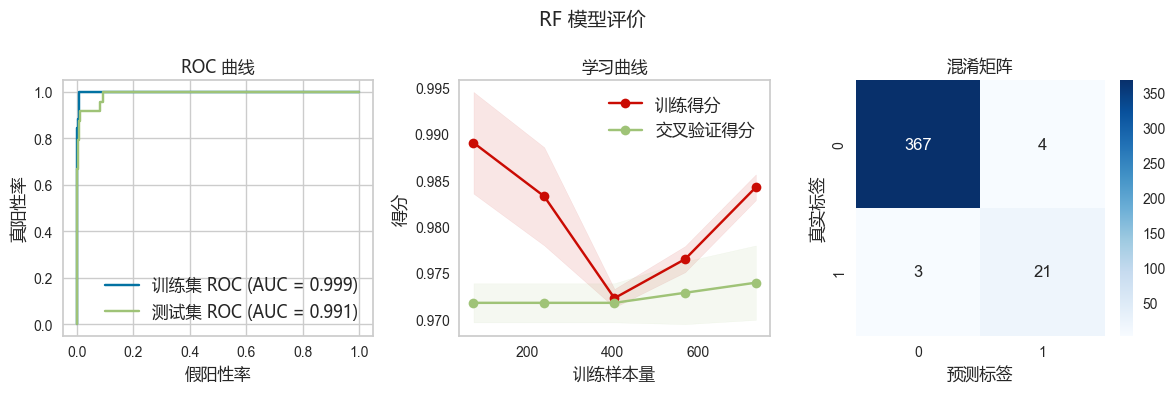

In [81]:
# 使用 predict_proba 而不是 predict
y_proba_train = rf_clf.predict_proba(Xtrain)[:, 1]  # 获取正类的概率
y_proba_test = rf_clf.predict_proba(Xtest)[:, 1]

# 应用最佳阈值进行分类
y_pred_train = (y_proba_train > best_threshold_rf).astype(int)
y_pred_test = (y_proba_test > best_threshold_rf).astype(int)

# 计算准确率
acc_train = accuracy_score(y_pred_train, Ytrain) * 100
acc_test = accuracy_score(y_pred_test, Ytest) * 100

# 输出分类报告
print(classification_report(Ytest, y_pred_test))

fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # 为三个子图调整画布大小
plot_evaluation_curves(rf_clf, Xtrain, Ytrain, Xtest, Ytest, axes, "RF", font_prop, en_font_prop,best_threshold_rf)
plt.show()

In [82]:
def gbc_objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 10, 1000)
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e1, log=True)
    max_depth= trial.suggest_int("max_depth", 1, 400)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 40)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 40)
    max_features = trial.suggest_categorical("max_features", ["auto", "sqrt", "log2"])


    model = GradientBoostingClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features
    )
    score = cross_val_score(model,  Xtrain, Ytrain, cv=5, n_jobs=-1).mean()
    return score
print("Optimizing GradientBoostingClassifier...")
gbc_study = optuna.create_study(direction="maximize")
gbc_study.optimize(gbc_objective, n_trials=n_trials)

print("Best parameters for GradientBoostingClassifier:")
gbc_best_params = gbc_study.best_params
print(gbc_best_params)

gbc_clf = GradientBoostingClassifier(**gbc_best_params).fit(Xtrain, Ytrain)

[I 2024-01-21 13:47:55,316] A new study created in memory with name: no-name-369a5331-809e-4f1e-b6ba-b3a97b7fc740


Optimizing GradientBoostingClassifier...


[I 2024-01-21 13:47:56,150] Trial 0 finished with value: 0.9717743830787308 and parameters: {'n_estimators': 737, 'learning_rate': 0.00012466998028087624, 'max_depth': 282, 'min_samples_split': 28, 'min_samples_leaf': 37, 'max_features': 'log2'}. Best is trial 0 with value: 0.9717743830787308.
[I 2024-01-21 13:47:57,674] Trial 1 finished with value: 0.9858813160987074 and parameters: {'n_estimators': 692, 'learning_rate': 0.026672894033262735, 'max_depth': 398, 'min_samples_split': 35, 'min_samples_leaf': 18, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.9858813160987074.
[I 2024-01-21 13:47:59,136] Trial 2 finished with value: 0.9717743830787308 and parameters: {'n_estimators': 582, 'learning_rate': 0.00013451843078718127, 'max_depth': 364, 'min_samples_split': 18, 'min_samples_leaf': 28, 'max_features': 'auto'}. Best is trial 1 with value: 0.9858813160987074.
[I 2024-01-21 13:47:59,982] Trial 3 finished with value: 0.9456756756756757 and parameters: {'n_estimators': 767, 'le

Best parameters for GradientBoostingClassifier:
{'n_estimators': 506, 'learning_rate': 0.023220665823028654, 'max_depth': 295, 'min_samples_split': 32, 'min_samples_leaf': 8, 'max_features': 'sqrt'}


最佳阈值: 0.01263110200702644
最终准确率: 0.9848101265822785
最终F1分数: 0.875
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       371
           1       0.88      0.88      0.88        24

    accuracy                           0.98       395
   macro avg       0.93      0.93      0.93       395
weighted avg       0.98      0.98      0.98       395



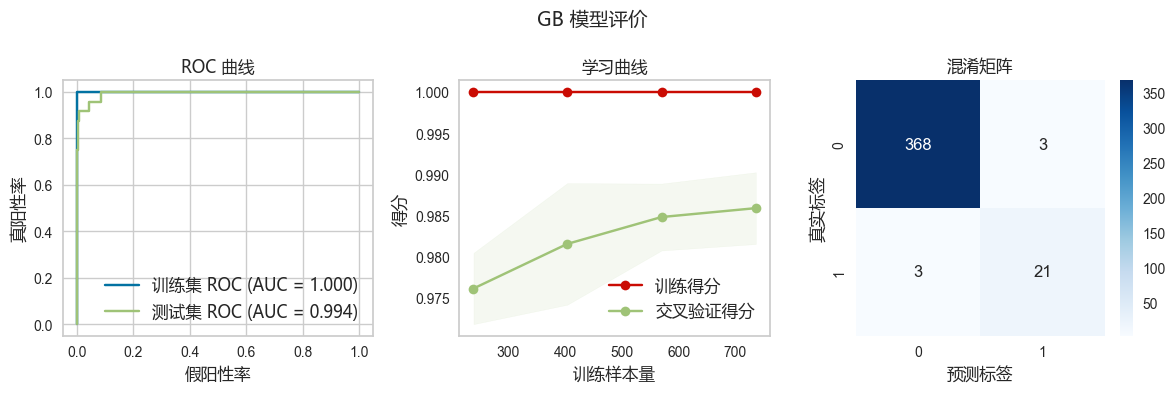

In [83]:

gbc_clf.fit(Xtrain, Ytrain)

# 使用模型进行预测
y_pred = gbc_clf.predict(Xtest)

# 获取预测概率
probabilities = gbc_clf.predict_proba(Xtest)[:, 1]

# 计算精确度和召回率
precision, recall, thresholds = precision_recall_curve(Ytest, probabilities)

# 添加最后一个阈值1（确保完整的覆盖）
thresholds = np.append(thresholds, 1)

# 计算每个阈值的F1分数
f1_scores = 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1])

# 找到最大F1分数及对应的阈值
max_f1_index = np.nanargmax(f1_scores)  # 使用nanargmax处理NaN值
best_threshold_gb = thresholds[max_f1_index]
best_f1 = f1_scores[max_f1_index]

# 使用最佳阈值进行最终预测
final_preds = (probabilities > best_threshold_gb).astype(int)

# 计算最终模型的性能指标
final_accuracy = accuracy_score(Ytest, final_preds)
final_f1 = f1_score(Ytest, final_preds)

# 输出最佳阈值及性能指标
print("最佳阈值:", best_threshold_gb)
print("最终准确率:", final_accuracy)
print("最终F1分数:", final_f1)

# 使用 predict_proba 而不是 predict
y_proba_train = gbc_clf.predict_proba(Xtrain)[:, 1]  # 获取正类的概率
y_proba_test = gbc_clf.predict_proba(Xtest)[:, 1]

# 应用最佳阈值进行分类
y_pred_train = (y_proba_train > best_threshold_gb).astype(int)
y_pred_test = (y_proba_test > best_threshold_gb).astype(int)

# 计算准确率
acc_train = accuracy_score(y_pred_train, Ytrain) * 100
acc_test = accuracy_score(y_pred_test, Ytest) * 100

# 输出分类报告
print(classification_report(Ytest, y_pred_test))

fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # 为三个子图调整画布大小
plot_evaluation_curves(gbc_clf, Xtrain, Ytrain, Xtest, Ytest, axes, "GB", font_prop, en_font_prop,best_threshold_gb)
plt.show()

In [84]:
from xgboost import XGBClassifier

def xgb_objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 10, 1000, step=100)
    max_depth = trial.suggest_int("max_depth", 1, 100)
    learning_rate = trial.suggest_float("learning_rate", 0.0001, 1.0, log=True)
    min_child_weight = trial.suggest_int("min_child_weight", 1, 10)
    subsample = trial.suggest_float("subsample", 0.1, 1.0)
    colsample_bytree = trial.suggest_float("colsample_bytree", 0.1, 1.0)
    
    model = XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        min_child_weight=min_child_weight,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        random_state=42,
        n_jobs=-1
    )
    score = cross_val_score(model,  Xtrain, Ytrain, cv=5, n_jobs=-1).mean()
    return score
print("Optimizing XGBoost...")
xgb_study = optuna.create_study(direction="maximize")
xgb_study.optimize(xgb_objective, n_trials=n_trials)

print("Best parameters for XGBoost:")
xgb_best_params = xgb_study.best_params
print(xgb_best_params)

xgb_clf = XGBClassifier(**xgb_best_params).fit(Xtrain, Ytrain)

[I 2024-01-21 13:49:35,952] A new study created in memory with name: no-name-8e7a034d-0354-4e9b-b03f-f3c992dc7125


Optimizing XGBoost...


[I 2024-01-21 13:49:36,297] Trial 0 finished with value: 0.9717743830787308 and parameters: {'n_estimators': 610, 'max_depth': 70, 'learning_rate': 0.00031641953238793904, 'min_child_weight': 9, 'subsample': 0.25584066744357314, 'colsample_bytree': 0.7396377010385381}. Best is trial 0 with value: 0.9717743830787308.
[I 2024-01-21 13:49:36,372] Trial 1 finished with value: 0.9717743830787308 and parameters: {'n_estimators': 10, 'max_depth': 8, 'learning_rate': 0.01774923487194708, 'min_child_weight': 8, 'subsample': 0.8920699902321538, 'colsample_bytree': 0.6674347547529118}. Best is trial 0 with value: 0.9717743830787308.
[I 2024-01-21 13:49:36,557] Trial 2 finished with value: 0.9717743830787308 and parameters: {'n_estimators': 310, 'max_depth': 76, 'learning_rate': 0.015099653564683464, 'min_child_weight': 9, 'subsample': 0.28039068401551903, 'colsample_bytree': 0.5139203473065054}. Best is trial 0 with value: 0.9717743830787308.
[I 2024-01-21 13:49:36,722] Trial 3 finished with valu

Best parameters for XGBoost:
{'n_estimators': 710, 'max_depth': 26, 'learning_rate': 0.8695528967864995, 'min_child_weight': 4, 'subsample': 0.5818334831615766, 'colsample_bytree': 0.9429810809236396}


最佳阈值: 0.19150570034980774
最终准确率: 0.9848101265822785
最终F1分数: 0.8636363636363635
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       371
           1       0.95      0.79      0.86        24

    accuracy                           0.98       395
   macro avg       0.97      0.89      0.93       395
weighted avg       0.98      0.98      0.98       395



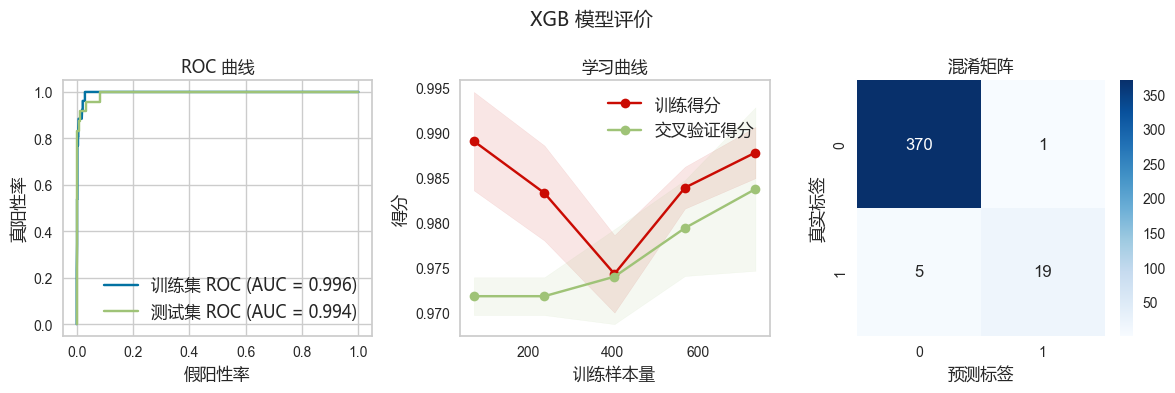

In [85]:

xgb_clf.fit(Xtrain, Ytrain)

# 使用模型进行预测
y_pred = xgb_clf.predict(Xtest)

# 获取预测概率
probabilities = xgb_clf.predict_proba(Xtest)[:, 1]

# 计算精确度和召回率
precision, recall, thresholds = precision_recall_curve(Ytest, probabilities)

# 添加最后一个阈值1（确保完整的覆盖）
thresholds = np.append(thresholds, 1)

# 计算每个阈值的F1分数
f1_scores = 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1])

# 找到最大F1分数及对应的阈值
max_f1_index = np.nanargmax(f1_scores)  # 使用nanargmax处理NaN值
best_threshold_xgb = thresholds[max_f1_index]
best_f1 = f1_scores[max_f1_index]

# 使用最佳阈值进行最终预测
final_preds = (probabilities > best_threshold_xgb).astype(int)

# 计算最终模型的性能指标
final_accuracy = accuracy_score(Ytest, final_preds)
final_f1 = f1_score(Ytest, final_preds)

# 输出最佳阈值及性能指标
print("最佳阈值:", best_threshold_xgb)
print("最终准确率:", final_accuracy)
print("最终F1分数:", final_f1)

# 使用 predict_proba 而不是 predict
y_proba_train = xgb_clf.predict_proba(Xtrain)[:, 1]  # 获取正类的概率
y_proba_test = xgb_clf.predict_proba(Xtest)[:, 1]

# 应用最佳阈值进行分类
y_pred_train = (y_proba_train > best_threshold_xgb).astype(int)
y_pred_test = (y_proba_test > best_threshold_xgb).astype(int)

# 计算准确率
acc_train = accuracy_score(y_pred_train, Ytrain) * 100
acc_test = accuracy_score(y_pred_test, Ytest) * 100

# 输出分类报告
print(classification_report(Ytest, y_pred_test))

fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # 为三个子图调整画布大小
plot_evaluation_curves(xgb_clf, Xtrain, Ytrain, Xtest, Ytest, axes, "XGB", font_prop, en_font_prop,best_threshold_xgb)
plt.show()

In [86]:
def dt_objective(trial):
    criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])
    splitter = trial.suggest_categorical("splitter", ["best", "random"])
    max_depth = trial.suggest_int("max_depth", 1, 500)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 200)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 200)
    max_features = trial.suggest_categorical("max_features", ["auto", "sqrt", "log2"])

    model = DecisionTreeClassifier(
        criterion=criterion,
        splitter=splitter,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features
    )
    score = cross_val_score(model, Xtrain,Ytrain, cv=5, n_jobs=-1).mean()
    return score

print("Optimizing DecisionTreeClassifier...")
dt_study = optuna.create_study(direction="maximize")
dt_study.optimize(dt_objective, n_trials=n_trials)

print("Best parameters for DecisionTreeClassifier:")
dt_best_params = dt_study.best_params
print(dt_best_params)

dt_clf = DecisionTreeClassifier(**dt_best_params).fit(Xtrain,Ytrain)

[I 2024-01-21 13:49:51,938] A new study created in memory with name: no-name-909c60f6-f6a2-43c6-ae0b-c5575afce9d8
[I 2024-01-21 13:49:51,946] Trial 0 finished with value: 0.9761104582843713 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 335, 'min_samples_split': 147, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.9761104582843713.
[I 2024-01-21 13:49:51,955] Trial 1 finished with value: 0.9717743830787308 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 395, 'min_samples_split': 36, 'min_samples_leaf': 16, 'max_features': 'log2'}. Best is trial 0 with value: 0.9761104582843713.
[I 2024-01-21 13:49:51,963] Trial 2 finished with value: 0.9717743830787308 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 462, 'min_samples_split': 192, 'min_samples_leaf': 20, 'max_features': 'log2'}. Best is trial 0 with value: 0.9761104582843713.
[I 2024-01-21 13:49:51,970] Trial 3 finished with value:

Optimizing DecisionTreeClassifier...


[I 2024-01-21 13:49:52,122] Trial 17 finished with value: 0.9717743830787308 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 130, 'min_samples_split': 87, 'min_samples_leaf': 44, 'max_features': 'auto'}. Best is trial 0 with value: 0.9761104582843713.
[I 2024-01-21 13:49:52,135] Trial 18 finished with value: 0.9717743830787308 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 242, 'min_samples_split': 126, 'min_samples_leaf': 126, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.9761104582843713.
[I 2024-01-21 13:49:52,150] Trial 19 finished with value: 0.9717743830787308 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 429, 'min_samples_split': 164, 'min_samples_leaf': 77, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.9761104582843713.
[I 2024-01-21 13:49:52,164] Trial 20 finished with value: 0.9717743830787308 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 477, 'min_samples_

Best parameters for DecisionTreeClassifier:
{'criterion': 'gini', 'splitter': 'random', 'max_depth': 282, 'min_samples_split': 60, 'min_samples_leaf': 8, 'max_features': 'sqrt'}


最佳阈值: 0.21621621621621623
最终准确率: 0.9189873417721519
最终F1分数: 0.3846153846153846
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       371
           1       0.36      0.42      0.38        24

    accuracy                           0.92       395
   macro avg       0.66      0.68      0.67       395
weighted avg       0.93      0.92      0.92       395



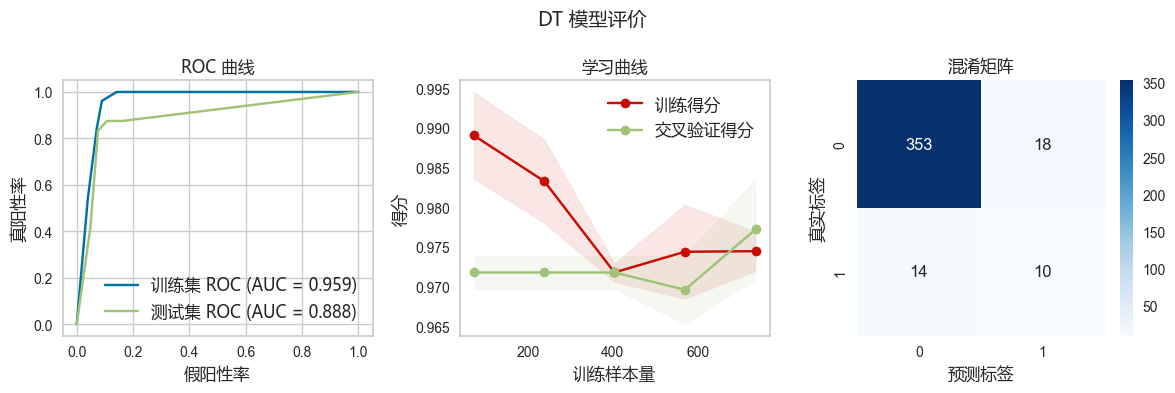

In [87]:
dt_clf.fit(Xtrain, Ytrain)

# 使用模型进行预测
y_pred = dt_clf.predict(Xtest)

# 获取预测概率
probabilities = dt_clf.predict_proba(Xtest)[:, 1]

# 计算精确度和召回率
precision, recall, thresholds = precision_recall_curve(Ytest, probabilities)

# 添加最后一个阈值1（确保完整的覆盖）
thresholds = np.append(thresholds, 1)

# 计算每个阈值的F1分数
f1_scores = 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1])

# 找到最大F1分数及对应的阈值
max_f1_index = np.nanargmax(f1_scores)  # 使用nanargmax处理NaN值
best_threshold_dt = thresholds[max_f1_index]
best_f1 = f1_scores[max_f1_index]

# 使用最佳阈值进行最终预测
final_preds = (probabilities > best_threshold_dt).astype(int)

# 计算最终模型的性能指标
final_accuracy = accuracy_score(Ytest, final_preds)
final_f1 = f1_score(Ytest, final_preds)

# 输出最佳阈值及性能指标
print("最佳阈值:", best_threshold_dt)
print("最终准确率:", final_accuracy)
print("最终F1分数:", final_f1)

# 使用 predict_proba 而不是 predict
y_proba_train = dt_clf.predict_proba(Xtrain)[:, 1]  # 获取正类的概率
y_proba_test = dt_clf.predict_proba(Xtest)[:, 1]

# 应用最佳阈值进行分类
y_pred_train = (y_proba_train > best_threshold_dt).astype(int)
y_pred_test = (y_proba_test > best_threshold_dt).astype(int)

# 计算准确率
acc_train = accuracy_score(y_pred_train, Ytrain) * 100
acc_test = accuracy_score(y_pred_test, Ytest) * 100

# 输出分类报告
print(classification_report(Ytest, y_pred_test))

fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # 为三个子图调整画布大小
plot_evaluation_curves(dt_clf, Xtrain, Ytrain, Xtest, Ytest, axes, "DT", font_prop, en_font_prop,best_threshold_dt)
plt.show()

In [88]:
def ad_objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 50, 500)
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-3, 1)
    algorithm = trial.suggest_categorical("algorithm", ["SAMME", "SAMME.R"])

    base_estimator = DecisionTreeClassifier(
        max_depth=dt_best_params["max_depth"],
        max_leaf_nodes=62
    )

    model = AdaBoostClassifier(
        base_estimator=base_estimator,
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        algorithm=algorithm
    )
    score = cross_val_score(model, Xtrain, Ytrain, cv=5, n_jobs=-1).mean()
    return score

print("Optimizing AdaBoostClassifier...")
ad_study = optuna.create_study(direction="maximize")
ad_study.optimize(ad_objective, n_trials=n_trials)

print("Best parameters for AdaBoostClassifier:")
ad_best_params = ad_study.best_params
print(ad_best_params)
ad_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=dt_best_params["max_depth"], max_leaf_nodes=62), **ad_best_params).fit(Xtrain, Ytrain)

[I 2024-01-21 13:49:52,601] A new study created in memory with name: no-name-719402f9-d870-4c95-ad58-a76833e11331
[I 2024-01-21 13:49:52,615] Trial 0 finished with value: 0.965252643948296 and parameters: {'n_estimators': 181, 'learning_rate': 0.0010166868722863147, 'algorithm': 'SAMME.R'}. Best is trial 0 with value: 0.965252643948296.
[I 2024-01-21 13:49:52,628] Trial 1 finished with value: 0.9652585193889541 and parameters: {'n_estimators': 192, 'learning_rate': 0.03768721261189344, 'algorithm': 'SAMME.R'}. Best is trial 1 with value: 0.9652585193889541.
[I 2024-01-21 13:49:52,641] Trial 2 finished with value: 0.9685135135135134 and parameters: {'n_estimators': 67, 'learning_rate': 0.306765765145107, 'algorithm': 'SAMME.R'}. Best is trial 2 with value: 0.9685135135135134.
[I 2024-01-21 13:49:52,654] Trial 3 finished with value: 0.9609165687426557 and parameters: {'n_estimators': 84, 'learning_rate': 0.007425279752433537, 'algorithm': 'SAMME.R'}. Best is trial 2 with value: 0.9685135

Optimizing AdaBoostClassifier...


[I 2024-01-21 13:49:52,795] Trial 13 finished with value: 0.9685135135135136 and parameters: {'n_estimators': 296, 'learning_rate': 0.36715878770260724, 'algorithm': 'SAMME'}. Best is trial 7 with value: 0.9706991774383079.
[I 2024-01-21 13:49:52,812] Trial 14 finished with value: 0.9630904817861339 and parameters: {'n_estimators': 411, 'learning_rate': 0.09235957901594692, 'algorithm': 'SAMME.R'}. Best is trial 7 with value: 0.9706991774383079.
[I 2024-01-21 13:49:52,828] Trial 15 finished with value: 0.9620035252643948 and parameters: {'n_estimators': 491, 'learning_rate': 0.3836391129653348, 'algorithm': 'SAMME'}. Best is trial 7 with value: 0.9706991774383079.
[I 2024-01-21 13:49:52,845] Trial 16 finished with value: 0.9696063454759107 and parameters: {'n_estimators': 350, 'learning_rate': 0.9422337878679562, 'algorithm': 'SAMME.R'}. Best is trial 7 with value: 0.9706991774383079.
[I 2024-01-21 13:49:52,862] Trial 17 finished with value: 0.963084606345476 and parameters: {'n_estima

Best parameters for AdaBoostClassifier:
{'n_estimators': 396, 'learning_rate': 0.6516822991249155, 'algorithm': 'SAMME.R'}


最佳阈值: 0.9999999999999998
最终准确率: 0.9392405063291139
最终F1分数: 0.0
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       371
           1       0.00      0.00      0.00        24

    accuracy                           0.94       395
   macro avg       0.47      0.50      0.48       395
weighted avg       0.88      0.94      0.91       395



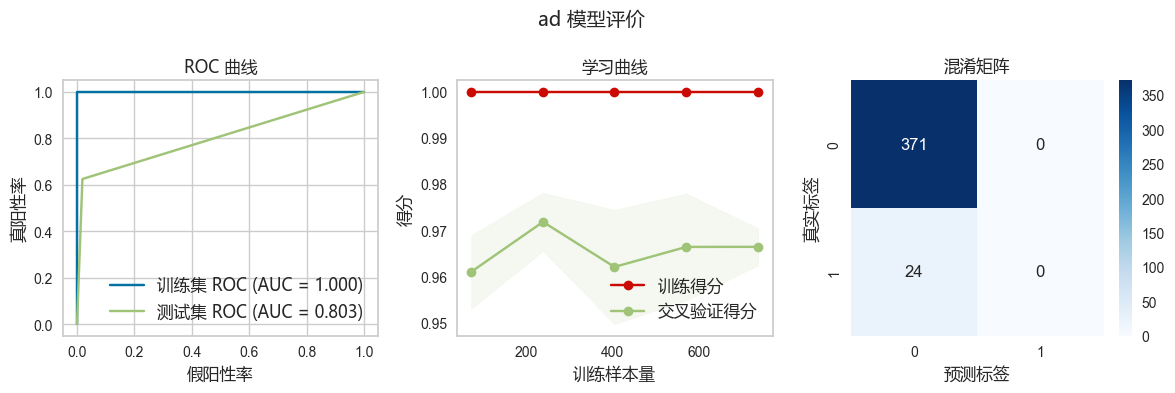

In [89]:
ad_clf.fit(Xtrain, Ytrain)

# 使用模型进行预测
y_pred = ad_clf.predict(Xtest)

# 获取预测概率
probabilities = ad_clf.predict_proba(Xtest)[:, 1]

# 计算精确度和召回率
precision, recall, thresholds = precision_recall_curve(Ytest, probabilities)

# 添加最后一个阈值1（确保完整的覆盖）
thresholds = np.append(thresholds, 1)

# 计算每个阈值的F1分数
f1_scores = 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1])

# 找到最大F1分数及对应的阈值
max_f1_index = np.nanargmax(f1_scores)  # 使用nanargmax处理NaN值
best_threshold_ad = thresholds[max_f1_index]
best_f1 = f1_scores[max_f1_index]

# 使用最佳阈值进行最终预测
final_preds = (probabilities > best_threshold_ad).astype(int)

# 计算最终模型的性能指标
final_accuracy = accuracy_score(Ytest, final_preds)
final_f1 = f1_score(Ytest, final_preds)

# 输出最佳阈值及性能指标
print("最佳阈值:", best_threshold_ad)
print("最终准确率:", final_accuracy)
print("最终F1分数:", final_f1)

# 使用 predict_proba 而不是 predict
y_proba_train = ad_clf.predict_proba(Xtrain)[:, 1]  # 获取正类的概率
y_proba_test = ad_clf.predict_proba(Xtest)[:, 1]

# 应用最佳阈值进行分类
y_pred_train = (y_proba_train > best_threshold_ad).astype(int)
y_pred_test = (y_proba_test > best_threshold_ad).astype(int)

# 计算准确率
acc_train = accuracy_score(y_pred_train, Ytrain) * 100
acc_test = accuracy_score(y_pred_test, Ytest) * 100

# 输出分类报告
print(classification_report(Ytest, y_pred_test))

fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # 为三个子图调整画布大小
plot_evaluation_curves(ad_clf, Xtrain, Ytrain, Xtest, Ytest, axes, "ad", font_prop, en_font_prop,best_threshold_ad)
plt.show()

In [90]:
def svm_objective(trial):
    C = trial.suggest_float("C", 1e-5, 1e1, log=True)
    kernel = trial.suggest_categorical("kernel", ["linear", "poly", "rbf", "sigmoid"])
    
    model = SVC(C=C, kernel=kernel, probability=True)
    score = cross_val_score(model,  Xtrain, Ytrain, cv=5, n_jobs=-1).mean()
    return score

print("Optimizing SVM...")
svm_study = optuna.create_study(direction="maximize")
svm_study.optimize(svm_objective, n_trials=n_trials)

print("Best parameters for SVM:")
svm_best_params = svm_study.best_params
print(svm_best_params)

svm_clf = SVC(**svm_best_params, probability=True).fit(Xtrain, Ytrain)


[I 2024-01-21 13:49:53,467] A new study created in memory with name: no-name-c6b9bc8c-b59f-4756-9932-cdb6cc82bf83
[I 2024-01-21 13:49:53,483] Trial 0 finished with value: 0.9717743830787308 and parameters: {'C': 0.000605409900766873, 'kernel': 'linear'}. Best is trial 0 with value: 0.9717743830787308.
[I 2024-01-21 13:49:53,500] Trial 1 finished with value: 0.9717743830787308 and parameters: {'C': 0.008365320529019329, 'kernel': 'linear'}. Best is trial 0 with value: 0.9717743830787308.
[I 2024-01-21 13:49:53,516] Trial 2 finished with value: 0.972843713278496 and parameters: {'C': 2.29940227247742, 'kernel': 'sigmoid'}. Best is trial 2 with value: 0.972843713278496.
[I 2024-01-21 13:49:53,528] Trial 3 finished with value: 0.9717743830787308 and parameters: {'C': 3.770897043040698e-05, 'kernel': 'poly'}. Best is trial 2 with value: 0.972843713278496.
[I 2024-01-21 13:49:53,558] Trial 4 finished with value: 0.9717743830787308 and parameters: {'C': 0.041912297387613456, 'kernel': 'rbf'}.

Optimizing SVM...


[I 2024-01-21 13:49:53,651] Trial 10 finished with value: 0.9782902467685076 and parameters: {'C': 9.50162497795438, 'kernel': 'linear'}. Best is trial 9 with value: 0.9858871915393654.
[I 2024-01-21 13:49:53,670] Trial 11 finished with value: 0.9782902467685076 and parameters: {'C': 7.232418842960636, 'kernel': 'linear'}. Best is trial 9 with value: 0.9858871915393654.
[I 2024-01-21 13:49:53,689] Trial 12 finished with value: 0.9858871915393654 and parameters: {'C': 0.9352883145982129, 'kernel': 'linear'}. Best is trial 9 with value: 0.9858871915393654.
[I 2024-01-21 13:49:53,708] Trial 13 finished with value: 0.9858813160987074 and parameters: {'C': 0.47857261221116754, 'kernel': 'linear'}. Best is trial 9 with value: 0.9858871915393654.
[I 2024-01-21 13:49:53,735] Trial 14 finished with value: 0.9717743830787308 and parameters: {'C': 0.5587401682753409, 'kernel': 'rbf'}. Best is trial 9 with value: 0.9858871915393654.
[I 2024-01-21 13:49:53,754] Trial 15 finished with value: 0.98480

Best parameters for SVM:
{'C': 0.41867340180928814, 'kernel': 'linear'}


最佳阈值: 0.14320113242448707
最终准确率: 0.9392405063291139
最终F1分数: 0.0
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       371
           1       0.00      0.00      0.00        24

    accuracy                           0.94       395
   macro avg       0.47      0.50      0.48       395
weighted avg       0.88      0.94      0.91       395



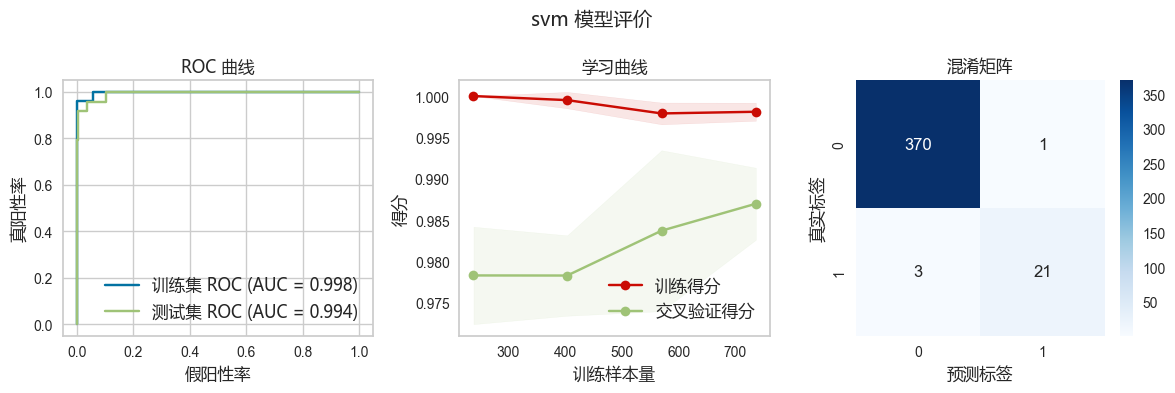

In [91]:
svm_clf.fit(Xtrain, Ytrain)

# 使用模型进行预测
y_pred = svm_clf.predict(Xtest)

# 获取预测概率
probabilities = svm_clf.predict_proba(Xtest)[:, 1]

# 计算精确度和召回率
precision, recall, thresholds = precision_recall_curve(Ytest, probabilities)

# 添加最后一个阈值1（确保完整的覆盖）
thresholds = np.append(thresholds, 1)

# 计算每个阈值的F1分数
f1_scores = 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1])

# 找到最大F1分数及对应的阈值
max_f1_index = np.nanargmax(f1_scores)  # 使用nanargmax处理NaN值
best_threshold_svm = thresholds[max_f1_index]
best_f1 = f1_scores[max_f1_index]

# 使用最佳阈值进行最终预测
final_preds = (probabilities > best_threshold_ad).astype(int)

# 计算最终模型的性能指标
final_accuracy = accuracy_score(Ytest, final_preds)
final_f1 = f1_score(Ytest, final_preds)

# 输出最佳阈值及性能指标
print("最佳阈值:", best_threshold_svm)
print("最终准确率:", final_accuracy)
print("最终F1分数:", final_f1)

# 使用 predict_proba 而不是 predict
y_proba_train = svm_clf.predict_proba(Xtrain)[:, 1]  # 获取正类的概率
y_proba_test = svm_clf.predict_proba(Xtest)[:, 1]

# 应用最佳阈值进行分类
y_pred_train = (y_proba_train > best_threshold_ad).astype(int)
y_pred_test = (y_proba_test > best_threshold_ad).astype(int)

# 计算准确率
acc_train = accuracy_score(y_pred_train, Ytrain) * 100
acc_test = accuracy_score(y_pred_test, Ytest) * 100

# 输出分类报告
print(classification_report(Ytest, y_pred_test))

fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # 为三个子图调整画布大小
plot_evaluation_curves(svm_clf, Xtrain, Ytrain, Xtest, Ytest, axes, "svm", font_prop, en_font_prop,best_threshold_svm)
plt.show()

In [92]:
def lr_objective(trial):
    C = trial.suggest_float('C', 1e-6, 1e+6, log=True)
    penalty = trial.suggest_categorical('penalty', [ 'l2', 'none'])
    if penalty == 'elasticnet':
        l1_ratio = trial.suggest_float('l1_ratio', 0, 1)
    else:
        l1_ratio = None
    model = LogisticRegression(C=C, penalty=penalty, l1_ratio=l1_ratio, random_state=42,n_jobs=-1)
    score = cross_val_score(model,  Xtrain, Ytrain, cv=5, n_jobs=-1).mean()
    return score

print("Optimizing LogisticRegression...")
lr_study = optuna.create_study(direction="maximize")
lr_study.optimize(lr_objective, n_trials=n_trials)

print("Best parameters for LogisticRegression:")
lr_best_params = lr_study.best_params
print(lr_best_params)

lr_clf = LogisticRegression(n_jobs=-1, **lr_best_params).fit(Xtrain, Ytrain)

[I 2024-01-21 13:49:54,535] A new study created in memory with name: no-name-2c5df548-8cd0-4746-b077-3b79e7d2be79
[I 2024-01-21 13:49:54,551] Trial 0 finished with value: 0.973942420681551 and parameters: {'C': 889513.0973304793, 'penalty': 'none'}. Best is trial 0 with value: 0.973942420681551.
[I 2024-01-21 13:49:54,564] Trial 1 finished with value: 0.9837074030552291 and parameters: {'C': 0.10556005984685357, 'penalty': 'l2'}. Best is trial 1 with value: 0.9837074030552291.
[I 2024-01-21 13:49:54,577] Trial 2 finished with value: 0.973942420681551 and parameters: {'C': 943.6754360528961, 'penalty': 'none'}. Best is trial 1 with value: 0.9837074030552291.
[I 2024-01-21 13:49:54,590] Trial 3 finished with value: 0.9815334900117509 and parameters: {'C': 0.07396471188502383, 'penalty': 'l2'}. Best is trial 1 with value: 0.9837074030552291.
[I 2024-01-21 13:49:54,602] Trial 4 finished with value: 0.9717743830787308 and parameters: {'C': 0.019463418340703545, 'penalty': 'l2'}. Best is tri

Optimizing LogisticRegression...


[I 2024-01-21 13:49:54,712] Trial 11 finished with value: 0.9837132784958872 and parameters: {'C': 11.630722046199931, 'penalty': 'l2'}. Best is trial 7 with value: 0.9837132784958872.
[I 2024-01-21 13:49:54,730] Trial 12 finished with value: 0.9837132784958872 and parameters: {'C': 21.955299914414436, 'penalty': 'l2'}. Best is trial 7 with value: 0.9837132784958872.
[I 2024-01-21 13:49:54,748] Trial 13 finished with value: 0.9837132784958872 and parameters: {'C': 16.01666216410636, 'penalty': 'l2'}. Best is trial 7 with value: 0.9837132784958872.
[I 2024-01-21 13:49:54,765] Trial 14 finished with value: 0.9858813160987074 and parameters: {'C': 5.495126594722097, 'penalty': 'l2'}. Best is trial 14 with value: 0.9858813160987074.
[I 2024-01-21 13:49:54,778] Trial 15 finished with value: 0.9717743830787308 and parameters: {'C': 0.0036765595219178356, 'penalty': 'l2'}. Best is trial 14 with value: 0.9858813160987074.
[I 2024-01-21 13:49:54,798] Trial 16 finished with value: 0.981539365452

Best parameters for LogisticRegression:
{'C': 1.3616868882984696, 'penalty': 'l2'}


最佳阈值: 0.20509512185119033
最终准确率: 0.9392405063291139
最终F1分数: 0.0
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       371
           1       0.00      0.00      0.00        24

    accuracy                           0.94       395
   macro avg       0.47      0.50      0.48       395
weighted avg       0.88      0.94      0.91       395



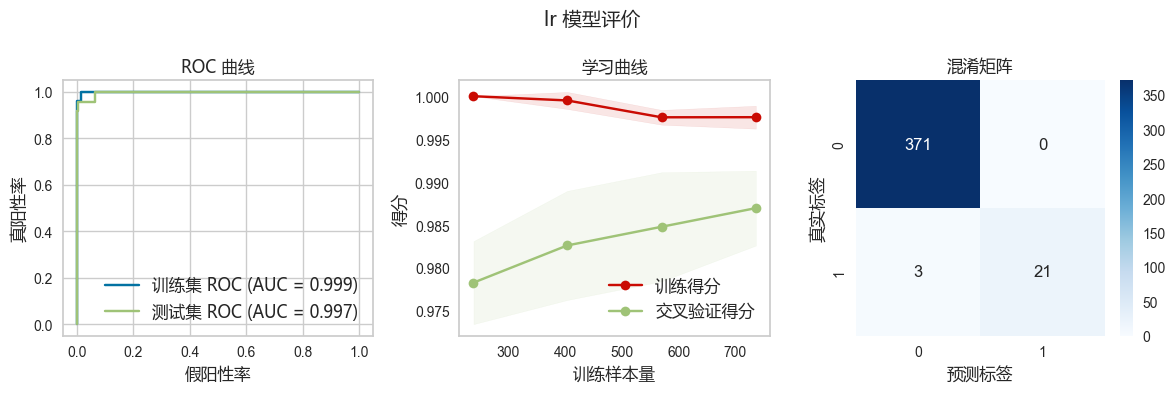

In [93]:
lr_clf.fit(Xtrain, Ytrain)

# 使用模型进行预测
y_pred = lr_clf.predict(Xtest)

# 获取预测概率
probabilities = lr_clf.predict_proba(Xtest)[:, 1]

# 计算精确度和召回率
precision, recall, thresholds = precision_recall_curve(Ytest, probabilities)

# 添加最后一个阈值1（确保完整的覆盖）
thresholds = np.append(thresholds, 1)

# 计算每个阈值的F1分数
f1_scores = 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1])

# 找到最大F1分数及对应的阈值
max_f1_index = np.nanargmax(f1_scores)  # 使用nanargmax处理NaN值
best_threshold_lr = thresholds[max_f1_index]
best_f1 = f1_scores[max_f1_index]

# 使用最佳阈值进行最终预测
final_preds = (probabilities > best_threshold_ad).astype(int)

# 计算最终模型的性能指标
final_accuracy = accuracy_score(Ytest, final_preds)
final_f1 = f1_score(Ytest, final_preds)

# 输出最佳阈值及性能指标
print("最佳阈值:", best_threshold_lr)
print("最终准确率:", final_accuracy)
print("最终F1分数:", final_f1)

# 使用 predict_proba 而不是 predict
y_proba_train = lr_clf.predict_proba(Xtrain)[:, 1]  # 获取正类的概率
y_proba_test = lr_clf.predict_proba(Xtest)[:, 1]

# 应用最佳阈值进行分类
y_pred_train = (y_proba_train > best_threshold_ad).astype(int)
y_pred_test = (y_proba_test > best_threshold_ad).astype(int)

# 计算准确率
acc_train = accuracy_score(y_pred_train, Ytrain) * 100
acc_test = accuracy_score(y_pred_test, Ytest) * 100

# 输出分类报告
print(classification_report(Ytest, y_pred_test))

fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # 为三个子图调整画布大小
plot_evaluation_curves(lr_clf, Xtrain, Ytrain, Xtest, Ytest, axes, "lr", font_prop, en_font_prop,best_threshold_lr)
plt.show()

In [ ]:
import shap
# 创建SHAP解释器
explainer = shap.Explainer(cat_clf)

# 计算特征重要性
shap_values = explainer.shap_values(Xtest)

# 绘制SHAP摘要图
shap.summary_plot(shap_values, Xtest)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)

# 拟合并应用欠采样
X_resampled, y_resampled = rus.fit_resample(Xtrain, Ytrain)



In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

# Fit and apply SMOTE oversampling
X_resampled, y_resampled = smote.fit_resample(Xtrain, Ytrain)


In [ ]:
def cat_objective(trial):
    depth = trial.suggest_int("depth", 2, 12)
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-3, 1)
    random_strength = trial.suggest_int("random_strength", 1, 10)
    iterations = trial.suggest_int("iterations", 50, 500)
    l2_leaf_reg = trial.suggest_loguniform("l2_leaf_reg", 1e-6, 10)  # L2 regularization parameter

    model = CatBoostClassifier(
        depth=depth,
        learning_rate=learning_rate,
        random_strength=random_strength,
        iterations=iterations,
        l2_leaf_reg=l2_leaf_reg,  # Use l2_leaf_reg for regularization
        silent=True,
        early_stopping_rounds=50,  # Implement early stopping
    )
    
    score = cross_val_score(model, Xtrain, Ytrain, cv=5, n_jobs=-1).mean()
    return score

print("Optimizing CatBoostClassifier...")
cat_study = optuna.create_study(direction="maximize")
cat_study.optimize(cat_objective, n_trials=n_trials)

print("Best parameters for CatBoostClassifier:")
cat_best_params = cat_study.best_params
print(cat_best_params)

cat_clf = CatBoostClassifier(**cat_best_params, silent=True).fit(Xtrain, Ytrain)

cat_clf.fit(X_resampled, y_resampled )

# 使用模型进行预测
y_pred = cat_clf.predict(Xtest)

# --- Prediction and Accuracy ---
y_pred_train = cat_clf.predict(X_resampled)
y_pred_test = cat_clf.predict(Xtest)
acc_train = accuracy_score(y_pred_train, y_resampled)*100
acc_test = accuracy_score(y_pred_test, Ytest)*100
    
# --- Classification Report --- 
print(classification_report(Ytest, y_pred_test))
    

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plot_evaluation_curves(cat_clf, X_resampled, y_resampled, Xtest, Ytest,y_pred, axes, algo_name="CatBoost")
plt.show()